# Final Chart - 2020

Imports pandas and reads dataframe

In [ ]:
import pandas as pd

df = pd.read_csv('https://data.smartdublin.ie/dataset/cc421859-1f4f-43f6-b349-f4ca0e1c60fa/resource/3048794e-16bd-4edb-9ba9-8018a6aadcdb/download/jan-oct-2020-ped-data.csv')

Sets date column to datetime

In [ ]:
df['Date & Time']= pd.to_datetime(df['Date & Time'], dayfirst=True)

The next two cells makes a dataframe from df which contains the rows at 18:00 each day, as I only want to compare the values at the same time

In [ ]:
new_df = pd.DataFrame(columns=df.columns)

In [ ]:
for index, row in df.iterrows():
  if row["Date & Time"].hour == 18:
    new_df = new_df.append(row)

Imports packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from IPython.display import display
import datetime

Records a few key dates which can be viewed in the graph

In [ ]:
first_lockdown = datetime.datetime(2020, 3, 12)

eased_restictions = datetime.datetime(2020, 5, 5)

phase_3 = datetime.datetime(2020, 6, 29)

second_lockdown = datetime.datetime(2020, 10, 21)

Gives weekly averages for streets, to make some graph types smoother.

I ommited the last week as it is not fully completed, at the time I am making this

In [ ]:
def find_avg_week(street):
  current_week = 1
  weekly_averages = []
  total_week = 0
  for index, row in new_df.iterrows():
    if row['Date & Time'].week == current_week:
      total_week += row[street]
    else:
      weekly_averages.append(total_week / 7)
      current_week = row['Date & Time'].week
      total_week = row[street]
  return weekly_averages

def find_months():
  current_week = 0
  dates = []
  for index, row in new_df.iterrows():
    if current_week != row["Date & Time"].week:
      dates.append(row["Date & Time"])
      current_week += 1
  return dates[:-1]

weekly_dates = find_months()

Function that makes the graph. It requires arguments made by the ipython interactive widget

In [92]:
def make_graph(street1, street2, chart, key_events):

    x = new_df["Date & Time"]

    ax = plt.subplot()
    colour_map = ['#6DA1E0', '#26C6DA']

    if chart == 'Line Chart':

      if street2 is not None:
        y1 = find_avg_week(street1)
        y2 = find_avg_week(street2)
        ax.plot_date(weekly_dates, y1,'b-', label=street1)
        ax.plot_date(weekly_dates, y2, 'b-', color='red',label=street2)

      else:
        y1 = find_avg_week(street1)
        ax.plot_date(weekly_dates, y1,'b-', label=street1)

    elif chart == 'Streamgraph':

      if street2 is not None:
        y1 = find_avg_week(street1)
        y2 = find_avg_week(street2)
        ax.stackplot(weekly_dates, [y1, y2], labels=[street1, street2], colors=colour_map, baseline='weighted_wiggle')

      else:
        y1 = find_avg_week(street1)
        ax.stackplot(weekly_dates, y1, labels=[street1], colors=colour_map,baseline='weighted_wiggle')

    else:

      if street2 is not None:
        y1 = new_df[street1]
        y2 = new_df[street2]
        ax.plot_date(x, y1, markersize=2, label=street1)
        ax.plot_date(x, y2, markersize=2, color='red', label=street2)

      else:
        y1 = new_df[street1]
        ax.plot_date(x, y1, markersize=2, label=street1)

    months = MonthLocator()
    monthsFmt = DateFormatter("%b")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)

    if key_events:
      ax.axvline(first_lockdown, color='black', linestyle='-', label='First Lockdown')
      ax.axvline(eased_restictions, color='black', linestyle='--', label='Eased Restrictions')
      ax.axvline(phase_3, color='black',linestyle=':', label='Phase 3')
      ax.axvline(second_lockdown, color='black', linestyle='-.', label='Second Lockdown')

    plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right')
    ax.set_title('Number of people on Dublin Streets in 2020')
    ax.set_ylabel('People in thousands')
    ax.set_xlabel('Date')

Makes the graph.

In [93]:
non_empty_streets = [name for name in new_df.columns[1:] if not np.isnan(new_df[name]).any()]

w = interactive(make_graph, street1=non_empty_streets, street2=[None] + non_empty_streets, chart=['Streamgraph', 'Line Chart', 'Scatter'], key_events=False)

display(w)

interactive(children=(Dropdown(description='street1', options=("O'Connell St Outside Pennys", "O'Connell St Ou…

Makes streamgraph of 4 streets in 2020

Shows that the Talbot Street South is not distributed similarly to the other streets

In [90]:
def make_streamgraph(streets, key_events):
  ax = plt.subplot()
  colour_map = ['#78909C', '#6DA1E0', '#26C6DA', '#112E51']

  ax.stackplot(weekly_dates, [find_avg_week(n) for n in streets], colors=colour_map, labels=streets, baseline='weighted_wiggle')

  months = MonthLocator()
  monthsFmt = DateFormatter("%b")
  ax.xaxis.set_major_locator(months)
  ax.xaxis.set_major_formatter(monthsFmt)

  if key_events:
    ax.axvline(first_lockdown, color='black', linestyle='-', label='First Lockdown')
    ax.axvline(eased_restictions, color='black', linestyle='--', label='Eased Restrictions')
    ax.axvline(phase_3, color='black',linestyle=':', label='Phase 3')
    ax.axvline(second_lockdown, color='black', linestyle='-.', label='Second Lockdown')

  plt.legend(bbox_to_anchor=(2, 1), loc='upper right')
  ax.set_title('Number of people on Dublin Streets in 2020')
  ax.set_ylabel('People in thousands')
  ax.set_xlabel('Date')

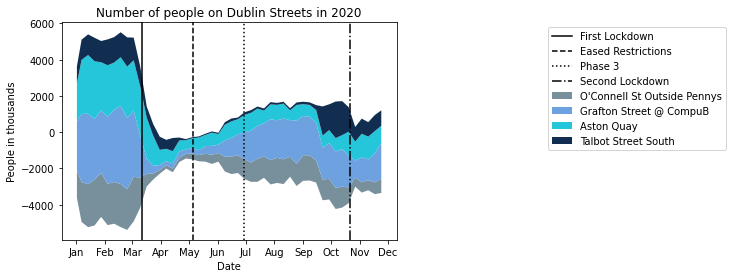

In [91]:
streets = ["O'Connell St Outside Pennys", "Grafton Street @ CompuB", "Aston Quay", "Talbot Street South"]

make_streamgraph(streets, True)